In [12]:
import pickle
import altair as alt
import pandas
with open('gridres.pkl', 'rb') as f: results = pickle.load(f)

def compose_lists(res):
    max_input_length = res[0]['max_input_length'] if res[0]['max_input_length'] is not None else -1
    return [res[0]['lr'], res[0]['batch_size'], res[0]['max_voc_size'], res[0]['context_length'], max_input_length, res[0]['embedding_size'], res[0]['optimizer'], res[1][-1][0], res[1][-1][1]]

prepan = []
for r in results:
    prepan.append(compose_lists(r))
    
cols = ['lr', 'batch_size', 'max_voc_size', 'context_length', 'max_input_length', 'embedding_size', 'optimizer', 'trloss', 'valacc']

# df is a pandas dataframe with all results
df = pandas.DataFrame(prepan, columns=cols)

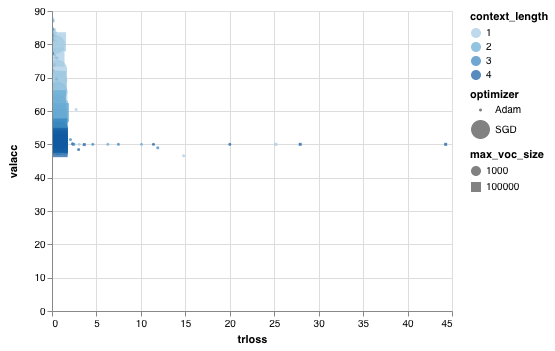

In [13]:
alt.Chart(df).mark_point().encode(
    x = 'trloss',
    y = 'valacc',
    color='lr:N',
    size='optimizer',
    shape='max_voc_size',
    fill='context_length:O',
    tooltip=['lr', 'batch_size', 'max_voc_size', 'context_length', 'max_input_length', 'embedding_size', 'optimizer']
).interactive()

In [31]:
def get_charts(col):
    brush = alt.selection(type='interval', resolve='global')

    chart = alt.Chart(df).mark_point().encode(
        alt.Y('valacc', scale=alt.Scale(zero=False)),
        color=alt.condition(brush, 'optimizer', alt.ColorValue('gray'))
    ).add_selection(
        brush
    ).properties(
        width=250,
        height=250
    )
    return chart.encode(x='{}:N'.format(col))

columns = ['lr', 'max_voc_size', 'context_length', 'max_input_length', 'embedding_size']
charts=[]
for i in columns:
    charts.append(get_charts(i))

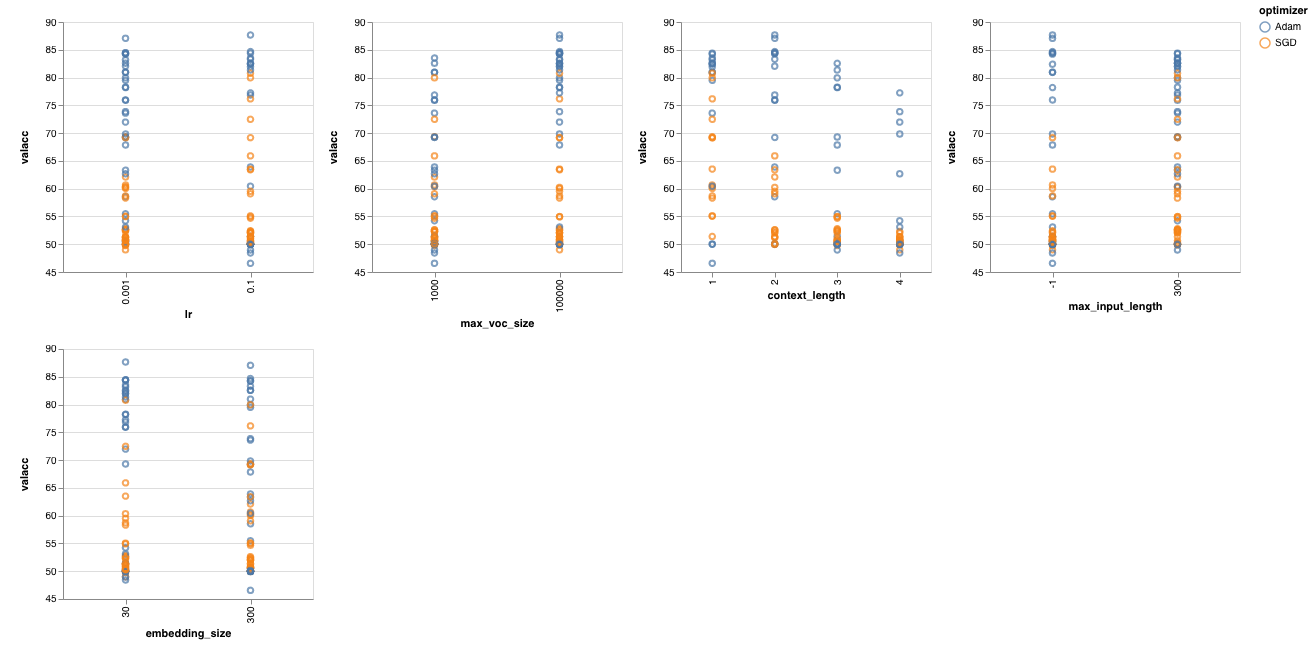

In [32]:
def facet_wrap(subplts, plots_per_row):
    rows = [subplts[i:i+plots_per_row] for i in range(0, len(subplts), plots_per_row)]
    compound_chart = alt.hconcat()
    for r in rows:
        rowplot = alt.vconcat() #start a new row
        for item in r:
            rowplot |= item #add suplot to current row as a new column
        compound_chart &= rowplot # add the entire row of plots as a new row
    return compound_chart

facet_wrap(charts, 4)